# Machine Learning Master Notes 21 - Logistic Sparse Categorical CE Softmax Regression

### Prepare Environment

In [1]:
%matplotlib inline


# Essential libraries
import numpy as np
import pandas as pd
import math
import scipy
import random
import datetime
from datetime import datetime

# Graphical Component
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import cm


## SciKit Learning Preprocessing  
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


# Pipeline and Train Test Split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

## SciKit Learn ML Models
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Multiclass
from sklearn import multiclass
from sklearn.multiclass import OneVsRestClassifier

## SciKit Learn Dataset
import sklearn.datasets as skdata
from sklearn.datasets import make_blobs, make_classification, make_circles, make_gaussian_quantiles

## Pytorch
import torch

## Tensorflow
import tensorflow as tf

# The following file contain the finalized gradient descent, cost function program 
import MyRegressionProgramV2 as my
import testFile as test


2024-10-30 12:18:06.512772: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Preparation of Simple Multi-Class Classification Data

### Example 1: 3 Class Custom Data

In [2]:
X1 = np.array([[1, 3], [2,4], [8, 9], [3,4],[7, 8.5], [6.8, 7.5], [2,5],[1.5, 2.5],[6,3],[7,4],[6,5], [6,8], [8,3],[5,4],[9,8]])
y1 = np.array([0, 0, 1, 0, 1, 1, 0, 0, 2, 2, 2, 1, 2, 2, 1])

In [3]:
X1_c0 = X1[y1 == 0]
X1_c1 = X1[y1 == 1]
X1_c2 = X1[y1 == 2]

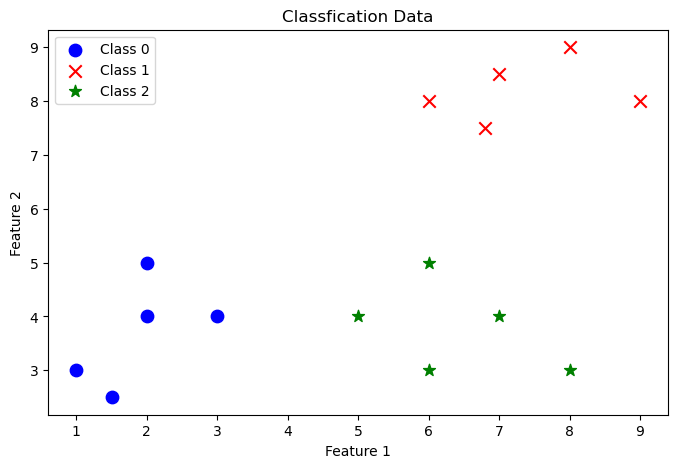

In [4]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(X1_c0[:,0], X1_c0[:,1], marker='o', s = 80, c='b', label="Class 0")
ax1.scatter(X1_c1[:,0], X1_c1[:,1], marker='x', s = 80, c='r', label="Class 1")
ax1.scatter(X1_c2[:,0], X1_c2[:,1], marker='*', s = 80, c='g', label="Class 2")
ax1.set_title('Classfication Data')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.legend(loc="upper left")
plt.show()

### Example 2: 3 Class Basic Example

In [5]:
X2, y2 = make_classification(n_samples=30, n_features = 2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=3, 
                             n_clusters_per_class = 1, random_state=15)

In [6]:
X2

array([[ 0.27912991, -1.44037331],
       [ 1.09078803,  2.87039611],
       [-0.1421124 , -1.92345206],
       [ 0.52621628,  0.19413389],
       [ 1.23776235, -0.80607812],
       [ 0.92997061,  2.2107433 ],
       [ 0.92163467, -0.99339502],
       [-1.25848203,  2.69425705],
       [-1.16747321,  1.02481538],
       [ 0.34863806,  0.15637629],
       [-0.91380625,  0.89020462],
       [-1.02732663,  1.31426767],
       [-0.79246704,  0.71060574],
       [ 1.23144309,  2.18451769],
       [-1.34277644,  2.39459039],
       [-0.89802635,  1.12900034],
       [ 1.60262439,  2.18545311],
       [-0.28457476, -2.03758725],
       [ 1.77926414, -0.46952691],
       [ 2.02633732,  2.02052107],
       [ 1.31489592, -0.27941799],
       [-1.14698508, -0.14463301],
       [ 1.13865231,  2.18013876],
       [ 0.56927256, -1.30431595],
       [ 1.35870645, -0.79851399],
       [ 1.45015611, -0.59655324],
       [-0.84034771,  0.09035531],
       [-0.17669223,  1.82078771],
       [-0.93615324,

In [7]:
y2

array([2, 1, 2, 1, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 2, 2, 1, 1, 0,
       1, 2, 2, 2, 0, 1, 0, 2])

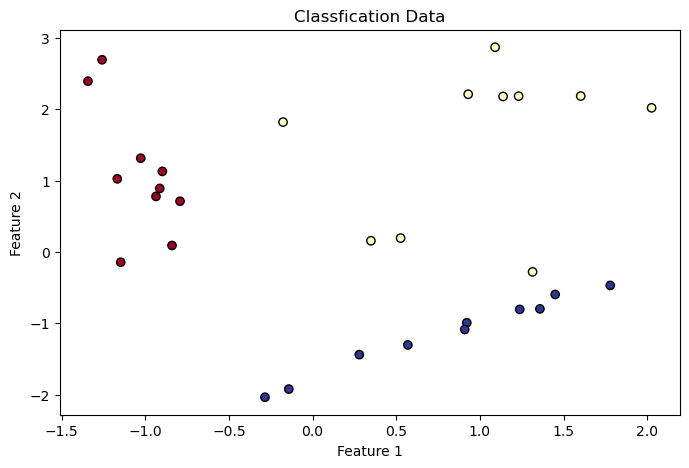

In [8]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(X2[:, 0], X2[:, 1], c=y2, edgecolors='k', cmap=plt.cm.RdYlBu)
ax1.set_title('Classfication Data')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
plt.show()

### Example 3 : 4 Class

In [11]:
X3, y3 = make_classification(n_samples=50, n_features = 2, n_informative = 2, n_redundant=0, n_repeated=0, 
                             n_classes=4, n_clusters_per_class = 1, random_state=33)

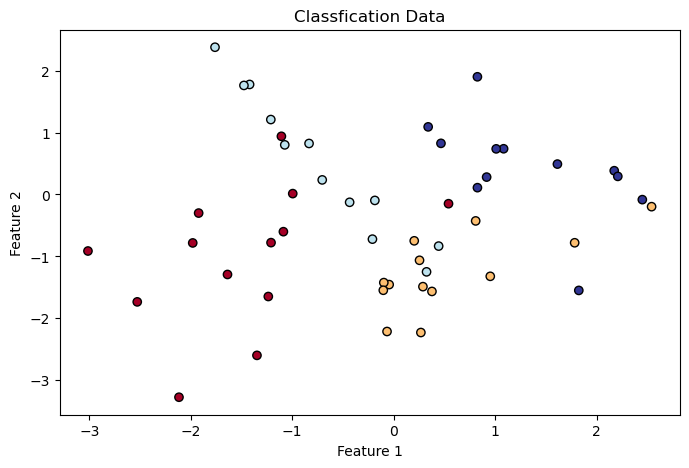

In [12]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(X3[:, 0], X3[:, 1], c=y3, edgecolors='k', cmap=plt.cm.RdYlBu)
ax1.set_title('Classfication Data')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
plt.show()

## Softmax Function and Loss Function

In [13]:
def mySoftmax_v2(fx):
    '''
    This Softmax function use the formula np.exp(X)/np.sum(np.exp(X))
    For matrix this function only accepts columns as features.
    The Softmax will work on per data observation in rows

    INPUT:
    fx = fx should be in (m,n) or (m,) 

    OUTPUT:
    softmax (matrix) if there is more than one feature. All the columns in a specific row added up to 1.
    '''
    # Taking care of infinity number
    fx = np.where(np.isinf(fx),  9.9e+307, fx)
    #print(fx)

    # if fx is 1d array, then use the following direct computation
    if fx.ndim == 1:
        softmax = np.exp(fx - np.max(fx))/np.sum(np.exp(fx - np.max(fx)))
    else:
        # process following if it is 2D array
        m,n = fx.shape
        # If it is only one column, use the following computation
        if n == 1:
            softmax = np.exp(fx - np.max(fx))/np.sum(np.exp(fx - np.max(fx)), keepdims=True)
        else:
            # If there is more than one column use axis = 1
            softmax = np.exp(fx - np.max(fx, axis=1, keepdims=True))/np.sum(np.exp(fx - np.max(fx, axis=1, keepdims=True)), axis=1, keepdims=True)
    return softmax

In [14]:
def mySparseCategoricalCrossEntropyCost(X,y,W,b):
    '''
    Sparse Categorical Cross Entropy Loss for Class Index Label

    INPUT:
    X = features data in matrix form in (m, n) matrix where m is the total number of examples and n is number of features
    y = also known as y or truth label. Accepts a matrix of one hot ecoding to each class.
    W = estimate W in matrix form in (n,k) where n is the number of features and k is number of classes
    b = estimate b in row vectors (1, k) where k is number of classes

    OUTPUT:
    loss = loss each observation
    cost = the mean of the loss function
    '''

    ## Dimension checking
    if y.ndim == 1:
        y = y.reshape(-1,1)

    if X.ndim == 1:
        X = X.reshape(-1,1)

    m,n = X.shape
    k = len(np.unique(y))

    ## Check the shape of data input to see if it is matched
    if W.shape != (n,k):
        print('Error, type mismatch for W. W must be n by k matrix where n = number of features, k = number of classes')
        return

    if b.shape != (1,k):
        print('Error, type mismatch for b. b must be 1 by k matrix where k = number of classes')
        return

    if X.shape[0] != y.shape[0]:
        print('Error, the total number of observation does not match between X and y')
        return
        

    ## Make prediction
    fx = X@W + b

    ## Applied Softmax
    softmax = mySoftmax_v2(fx)
    #print('softmax',softmax)

     ## Compute Loss Function
    loss = np.negative(np.log(softmax[np.arange(m).reshape(-1,1), y]+1e-20))

    ## Compute Cost
    cost = loss.mean()

    return cost, loss

In [15]:
def softmax_predict(X, coefficient, intercept):

    '''
    Make Softmax Prediction

    INPUT:
    X = (m by n) matrix of training data, each training examples (m) in rows and features (n) in column, 
        Single feature data must be in m by 1 vector, where m is total number of training examples.
    coefficient = the trained coefficient/weights in (n by k) matrix 
    intercept = the trained intercept in (1 by k) row vector 

    RETURN:
    y_predict, proba
    
    where
    y_predict = True or False if prediction over 0.5
    proba = the probability of the prediction.
    '''
    
    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()

    if X.ndim == 1:
        X = X.reshape(-1,1)
        
    ## Make prediction    
    fx = X@coefficient + intercept

    ## Applied Softmax
    softmax = mySoftmax_v2(fx)

    ## Compute Prediction and Probabilities
    y_predict = np.argmax(softmax, axis = 1)
    y_proba = np.max(softmax, axis = 1)
    
    return y_predict, y_proba

## Gradient Descent for Softmax (Multinomial) Logistic Regression Summary

Hypothesis: 
$$z = f_{w,b}(x) = f(x)$$
$$f(x) = b + wx$$
Softmax Function:
$$\sigma(z)_i=\frac{e^{z_i}}{\sum\limits_{j=1}^{k}e^{z_j}}$$
$$P(y=k|x)=\frac{e^{z_k}}{\sum\limits_{j=1}^{k}e^{z_j}}$$
where:
- $i$ is each element in a training example

Then:
$$P(y=k|x)=\frac{e^{f(x)_k}}{\sum\limits_{j=1}^{k}e^{f(x)_j}}$$
$$P(y=k|x)=\frac{e^{Xw_k+b_k}}{\sum\limits_{j=1}^{k}e^{Xw_j+b_j}}$$



$$ $$
Sparse-Categorical-Cross-Entropy Loss Function
$$Loss_{Sparse} = - log(\hat{y}_y)$$

Sparse-Categorical-Cross-Entropy Cost Function
$$\text{Cost Function}_{Sparse} = - \frac{1}{m}\sum\limits_{i=1}^{m}log(\hat{y}_{y_{i}})$$

Gradient Descent Algorithm: $$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$


Partial Derivatives: $$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (\hat{y}^{(i)} - y^{(i)})X^{(i)} \\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (\hat{y}^{(i)} - y^{(i)}) \\
\end{align}
$$

where:
$$\hat{y} = P(y=k|x)=\frac{e^{Xw_k+b_k}}{\sum\limits_{j=1}^{k}e^{Xw_j+b_j}}$$


Full Implementation of Gradient Descent:
$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{1}{m} \sum\limits_{i = 0}^{m-1} (\hat{y}^{(i)} - y^{(i)})X^{(i)}  \; \newline 
 b &= b -  \alpha \frac{1}{m} \sum\limits_{i = 0}^{m-1} (\hat{y}^{(i)} - y^{(i)})  \newline \rbrace
\end{align*}$$

**Reference: Apply Softmax function on Linear Equation**
- https://math.stackexchange.com/questions/2060944/gradient-of-a-softmax-applied-on-a-linear-function
- https://nbviewer.org/github/rasbt/python-machine-learning-book/blob/master/code/bonus/softmax-regression.ipynb

**Reference: Softmax Gradient on NN**
- https://math.stackexchange.com/questions/4258008/derivative-of-the-log-softmax-function
- https://eli.thegreenplace.net/2016/the-softmax-function-and-its-derivative/
- https://www.michaelpiseno.com/blog/2021/softmax-gradient/
- https://community.deeplearning.ai/t/calculating-gradient-of-softmax-function/1897/6
- https://community.deeplearning.ai/t/c2-w2-softmax-cost-computation-and-partial-derivatives/157928

**Other Softmax Reference**

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.
- https://www.kaggle.com/code/manishkc06/multi-class-logistic-regression-beginner-s-guide
- https://machinelearningmastery.com/multinomial-logistic-regression-with-python/
- https://towardsdatascience.com/multiclass-logistic-regression-from-scratch-9cc0007da372
- https://gist.github.com/sophiamyang/2ec198390126c412c1a9ab4c26c683ac#file-multiclass-logistic-py
- https://machinelearningmastery.com/softmax-activation-function-with-python/
- https://machinelearningmastery.com/cross-entropy-for-machine-learning/
- https://machinelearningmastery.com/discrete-probability-distributions-for-machine-learning/
- https://www.geeksforgeeks.org/how-to-implement-softmax-and-cross-entropy-in-python-and-pytorch/
- https://community.deeplearning.ai/t/multiclass-lab-how-is-softmax-implied-in-the-loss-function/349849/2
- https://www.parasdahal.com/softmax-crossentropy
- https://medium.com/@shine160700/softmax-function-and-the-maths-behind-it-12422d07c78a
- https://machinelearningmastery.com/what-is-information-entropy/
- https://d2l.ai/chapter_linear-classification/softmax-regression.html
- https://www.turing.com/kb/softmax-multiclass-neural-networks
- https://medium.com/@liangjinzhenggoon/the-difference-between-softmax-and-softmax-loss-173d385120c2
- https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html
- https://medium.com/@shireenchand/choosing-between-cross-entropy-and-sparse-cross-entropy-the-only-guide-you-need-abea92c84662#:~:text=Another%20caveat%20%E2%80%94%20Sparse%20Cross%20Entropy,0.3%2C%200.7%2C%200.1%5D.
- https://madalinabuzau.github.io/2016/11/29/gradient-descent-on-a-softmax-cross-entropy-cost-function.html

### Intuition of Computing Partial Derivative with Softmax (Sparse Categorical Cross Entropy)

**The steps is the same as Categorical Cross Entropy, except that the y truth is in class index form.**

For a training dataset of 2 features with 3 classes, we have established that for each training example, we need to perform probability computation for each classes:

$$f(x^{(i)})_{z_0} = z_0^{(i)} = (x_0^{(i)} \cdot w_0^{(i)}) + (x_1^{(i)} \cdot w_1^{(i)}) + b^{(i)}$$
$$f(x^{(i)})_{z_1} = z_1^{(i)} = (x_0^{(i)} \cdot w_0^{(i)}) + (x_1^{(i)} \cdot w_1^{(i)}) + b^{(i)}$$
$$f(x^{(i)})_{z_2} = z_2^{(i)} = (x_0^{(i)} \cdot w_0^{(i)}) + (x_1^{(i)} \cdot w_1^{(i)}) + b^{(i)}$$

We also need to construct the matrix of $W$ which is `number_of_features` by `number_of_class`.
$$W = \begin{bmatrix} w_{0,z0} & w_{0,z1} & w_{0,z2} \\ w_{1,z0} & w_{1,z1} & w_{1,z2} \end{bmatrix}$$
where the first index refers to the weights of feature and the second index should refer to each class.
$$$$
In this case, the shape of $W$ should be 2 by 3 (2 features 3 class).
$$ $$
$b$ should also be a vector of 1 by `number_of_class`.
$$b = \begin{bmatrix} b_{z0} & b_{z1} & b_{z2} \end{bmatrix}$$
$$$$
In this case, the shape of $b$ should be 1 by 3 (3 class).
$$$$
Assuming we have 5 training examples, then our $X$ should be a matrix of 5 by 2.

$$X = \begin{bmatrix} x_{0}^{(0)} & x_{1}^{(0)} \\ x_{0}^{(1)} & x_{1}^{(1)} \\ x_{0}^{(2)} & x_{1}^{(2)} \\ x_{0}^{(3)} & x_{1}^{(3)} \\ x_{0}^{(4)} & x_{1}^{(4)}\end{bmatrix}$$
$$$$
To compute $\hat{y}$, we need to have the dot product of $XW$. This will result in a matrix of 5 by 3. 

$$\begin{bmatrix} x_{0}^{(0)} & x_{1}^{(0)} \\ x_{0}^{(1)} & x_{1}^{(1)} \\ x_{0}^{(2)} & x_{1}^{(2)} \\ x_{0}^{(3)} & x_{1}^{(3)} \\ x_{0}^{(4)} & x_{1}^{(4)}\end{bmatrix} \cdot \begin{bmatrix} w_{0,z0} & w_{0,z1} & w_{0,z2} \\ w_{1,z0} & w_{1,z1} & w_{1,z2} \end{bmatrix} = \begin{bmatrix} xw_{z0}^{(0)} & xw_{z1}^{(0)} & xw_{z2}^{(0)} \\  xw_{z0}^{(1)} & xw_{z1}^{(1)} & xw_{z2}^{(1)} \\  xw_{z0}^{(2)} & xw_{z1}^{(2)} & xw_{z2}^{(2)} \\  xw_{z0}^{(3)} & xw_{z1}^{(3)} & xw_{z2}^{(3)} \\  xw_{z0}^{(4)} & xw_{z1}^{(4)} & xw_{z2}^{(4)} \end{bmatrix}$$

Then we apply an element wise operation of adding $b$. 

$$\begin{bmatrix} xw_{z0}^{(0)} & xw_{z1}^{(0)} & xw_{z2}^{(0)} \\  xw_{z0}^{(1)} & xw_{z1}^{(1)} & xw_{z2}^{(1)} \\  xw_{z0}^{(2)} & xw_{z1}^{(2)} & xw_{z2}^{(2)} \\  xw_{z0}^{(3)} & xw_{z1}^{(3)} & xw_{z2}^{(3)} \\  xw_{z0}^{(4)} & xw_{z1}^{(4)} & xw_{z2}^{(4)} \end{bmatrix} + \begin{bmatrix} b_{z0} & b_{z1} & b_{z2} \end{bmatrix}$$

The matrix computation $f(x^{(i)})$ should return a dimension of 1 by `num_of_class` matrix for a single training example.

The result for 5 training example should be
$$\hat{y} = \begin{bmatrix} p_{0}^{(0)} & p_{1}^{(0)} & p_{2}^{(0)} \\ p_{0}^{(1)} & p_{1}^{(1)} & p_{2}^{(1)} \\ p_{0}^{(2)} & p_{1}^{(2)} & p_{2}^{(2)} \\ p_{0}^{(3)} & p_{1}^{(3)} & p_{2}^{(3)} \\ p_{0}^{(4)} & p_{1}^{(4)} & p_{2}^{(4)} \end{bmatrix}$$

The shape of $\hat{y}$ should be 5,3. Next we need to apply the softmax function, so that the scores will convert to probability distribution.

$$$$
We also assume that we will be use sparse categorical cross entropy loss and cost function. 

$$ $$
**The key difference will be getting the difference between $\hat{y}$ and $y$ truth.**




The $y$ will be in class index form with a shape of m by 1 vectors.
$$$$
To compute the partial derivatives: $$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (\hat{y}^{(i)} - y^{(i)})X^{(i)} \\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (\hat{y}^{(i)} - y^{(i)}) \\
\end{align}
$$

Before that let us examine how one-hot encoding work:
The shape of $\hat{y}$ should be 5 by 3 and the shape of $y$ is 5 by 3

$$\hat{y} = \begin{bmatrix} p_{0}^{(0)} & p_{1}^{(0)} & p_{2}^{(0)} \\ p_{0}^{(1)} & p_{1}^{(1)} & p_{2}^{(1)} \\ p_{0}^{(2)} & p_{1}^{(2)} & p_{2}^{(2)} \\ p_{0}^{(3)} & p_{1}^{(3)} & p_{2}^{(3)} \\ p_{0}^{(4)} & p_{1}^{(4)} & p_{2}^{(4)} \end{bmatrix}$$

$$y = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}$$

Taking the difference $\hat{y} - y$

$$\hat{y} - y = \begin{bmatrix} p_{0}^{(0)} & p_{1}^{(0)} & p_{2}^{(0)} \\ p_{0}^{(1)} & p_{1}^{(1)} & p_{2}^{(1)} \\ p_{0}^{(2)} & p_{1}^{(2)} & p_{2}^{(2)} \\ p_{0}^{(3)} & p_{1}^{(3)} & p_{2}^{(3)} \\ p_{0}^{(4)} & p_{1}^{(4)} & p_{2}^{(4)} \end{bmatrix} - \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix} = \begin{bmatrix} p_{0}^{(0)} - 1 & p_{1}^{(0)} - 0 & p_{2}^{(0)} - 0 \\ p_{0}^{(1)} - 0 & p_{1}^{(1)} - 1 & p_{2}^{(1)} - 0 \\ p_{0}^{(2)} - 1 & p_{1}^{(2)} - 0 & p_{2}^{(2)} - 0 \\ p_{0}^{(3)} - 0 & p_{1}^{(3)} - 1 & p_{2}^{(3)} - 0 \\ p_{0}^{(4)} - 0 & p_{1}^{(4)} - 0 & p_{2}^{(4)} - 1 \end{bmatrix}$$

**From here, we can see that we need to $-1$ on the classes that matches the y truth. In the form of class index, we can do the following:**

$$\hat{y} - y = \begin{bmatrix} p_{0}^{(0)} & p_{1}^{(0)} & p_{2}^{(0)} \\ p_{0}^{(1)} & p_{1}^{(1)} & p_{2}^{(1)} \\ p_{0}^{(2)} & p_{1}^{(2)} & p_{2}^{(2)} \\ p_{0}^{(3)} & p_{1}^{(3)} & p_{2}^{(3)} \\ p_{0}^{(4)} & p_{1}^{(4)} & p_{2}^{(4)} \end{bmatrix} - \begin{bmatrix} 0 \\ 1 \\ 0 \\ 1 \\ 2 \end{bmatrix} = \begin{bmatrix} p_{0}^{(0)} - 1 & p_{1}^{(0)} - 0 & p_{2}^{(0)} - 0 \\ p_{0}^{(1)} - 0 & p_{1}^{(1)} - 1 & p_{2}^{(1)} - 0 \\ p_{0}^{(2)} - 1 & p_{1}^{(2)} - 0 & p_{2}^{(2)} - 0 \\ p_{0}^{(3)} - 0 & p_{1}^{(3)} - 1 & p_{2}^{(3)} - 0 \\ p_{0}^{(4)} - 0 & p_{1}^{(4)} - 0 & p_{2}^{(4)} - 1 \end{bmatrix}$$

**To achieve the outcome above, we need to select those prediction that matches the truth and -1, the rest remain. The steps is as follows:**
$$$$
- Select those Softmax that matches the truth and -1
- The rest should be remain as it is.

$$$$
The resulting matrix should be the same as the categorical cross entropy:
$$Loss = \begin{bmatrix} L_{z0}^{(0)} & L_{z1}^{(0)} & L_{z2}^{(0)} \\  L_{z0}^{(1)} & L_{z1}^{(1)} & L_{z2}^{(1)} \\  L_{z0}^{(2)} & L_{z1}^{(2)} & L_{z2}^{(2)} \\  L_{z0}^{(3)} & L_{z1}^{(3)} & L_{z2}^{(3)} \\  L_{z0}^{(4)} & L_{z1}^{(4)} & L_{z2}^{(4)} \end{bmatrix}$$

To compute the partial derivatives: $$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (\hat{y}^{(i)} - y^{(i)})X^{(i)} \\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (\hat{y}^{(i)} - y^{(i)}) \\
\end{align}
$$

Next we need to multiply $X$ by the $Loss$.

$$Loss = \begin{bmatrix} L_{z0}^{(0)} & L_{z1}^{(0)} & L_{z2}^{(0)} \\  L_{z0}^{(1)} & L_{z1}^{(1)} & L_{z2}^{(1)} \\  L_{z0}^{(2)} & L_{z1}^{(2)} & L_{z2}^{(2)} \\  L_{z0}^{(3)} & L_{z1}^{(3)} & L_{z2}^{(3)} \\  L_{z0}^{(4)} & L_{z1}^{(4)} & L_{z2}^{(4)} \end{bmatrix}$$

$$X = \begin{bmatrix} x_{0}^{(0)} & x_{1}^{(0)} \\ x_{0}^{(1)} & x_{1}^{(1)} \\ x_{0}^{(2)} & x_{1}^{(2)} \\ x_{0}^{(3)} & x_{1}^{(3)} \\ x_{0}^{(4)} & x_{1}^{(4)}\end{bmatrix}$$

To perform the dot product, we need to transpose X as follows:

$$X.T = \begin{bmatrix} x_{0}^{(0)} & x_{0}^{(1)} & x_{0}^{(2)}  & x_{0}^{(3)}  & x_{0}^{(4)}  \\ x_{1}^{(0)} & x_{1}^{(1)} & x_{1}^{(2)} & x_{1}^{(3)} & x_{1}^{(4)}\end{bmatrix}$$

The dot product of 2 by 5 matrix with the loss matrix of 5 by 3 will produce a 2 by 3 matrix which is the same of $W$

$$\begin{bmatrix} x_{0}^{(0)} & x_{0}^{(1)} & x_{0}^{(2)}  & x_{0}^{(3)}  & x_{0}^{(4)}  \\ x_{1}^{(0)} & x_{1}^{(1)} & x_{1}^{(2)} & x_{1}^{(3)} & x_{1}^{(4)}\end{bmatrix} \cdot \begin{bmatrix} L_{z0}^{(0)} & L_{z1}^{(0)} & L_{z2}^{(0)} \\  L_{z0}^{(1)} & L_{z1}^{(1)} & L_{z2}^{(1)} \\  L_{z0}^{(2)} & L_{z1}^{(2)} & L_{z2}^{(2)} \\  L_{z0}^{(3)} & L_{z1}^{(3)} & L_{z2}^{(3)} \\  L_{z0}^{(4)} & L_{z1}^{(4)} & L_{z2}^{(4)} \end{bmatrix} = dW = \begin{bmatrix} w_{0} & w_{0} & w_{0}   \\ w_{1} & w_{1} & w_{1}\end{bmatrix}$$

The result is already sum up, so we just need to divide by $m$.

#### Why do we need to do transpose? Let us look at Linear Regression Computation

In Linear Regression, we have $f(x) = b + x_0w_0 + x_1w_1$

Partial Derivative:
$$\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (\hat{y}^{(i)} - y^{(i)})x^{(i)} \\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (\hat{y}^{(i)} - y^{(i)}) \\
\end{align}$$

X is:
$$ $$
$$X = \begin{bmatrix} x_{0}^{(0)} & x_{1}^{(0)} \\ x_{0}^{(1)} & x_{1}^{(1)} \\ x_{0}^{(2)} & x_{1}^{(2)} \\ x_{0}^{(3)} & x_{1}^{(3)} \\ x_{0}^{(4)} & x_{1}^{(4)}\end{bmatrix}$$


Loss is :
$$Loss = \begin{bmatrix} L^{(0)} \\ L^{(1)} \\ L^{(2)} \\ L^{(3)} \\ L^{(4)}\end{bmatrix}$$

$$dW = \frac{1}{m}\sum\begin{bmatrix} L^{(0)}x_{0}^{(0)} & L^{(0)}x_{1}^{(0)} \\ L^{(1)}x_{0}^{(1)} & L^{(1)}x_{1}^{(1)} \\ L^{(2)}x_{0}^{(2)} & L^{(2)}x_{1}^{(2)} \\ L^{(3)}x_{0}^{(3)} & L^{(3)}x_{1}^{(3)} \\ L^{(4)}x_{0}^{(4)} & L^{(4)}x_{1}^{(4)}\end{bmatrix}= \begin{bmatrix} w_0 & w_1 \end{bmatrix}$$

In Linear Regression we just perform element wise computation and then sum it up later and divide my number of samples. Softmax also use the same principle except that the summing is done during the dot product. 

Back to partial derivative computation of softmax:

We can separate the computation into 2 parts
$$\begin{bmatrix} x_{0}^{(0)} & x_{0}^{(1)} & x_{0}^{(2)}  & x_{0}^{(3)}  & x_{0}^{(4)} \end{bmatrix} \cdot \begin{bmatrix} L_{z0}^{(0)} & L_{z1}^{(0)} & L_{z2}^{(0)} \\  L_{z0}^{(1)} & L_{z1}^{(1)} & L_{z2}^{(1)} \\  L_{z0}^{(2)} & L_{z1}^{(2)} & L_{z2}^{(2)} \\  L_{z0}^{(3)} & L_{z1}^{(3)} & L_{z2}^{(3)} \\  L_{z0}^{(4)} & L_{z1}^{(4)} & L_{z2}^{(4)} \end{bmatrix} = \sum \begin{bmatrix} L_{z0}^{(0)}x_{0}^{(0)} & L_{z1}^{(0)}x_{0}^{(0)} & L_{z2}^{(0)}x_{0}^{(0)} \\  L_{z0}^{(1)}x_{0}^{(1)} & L_{z1}^{(1)}x_{0}^{(1)} & L_{z2}^{(1)}x_{0}^{(1)} \\  L_{z0}^{(2)}x_{0}^{(2)} & L_{z1}^{(2)}x_{0}^{(2)} & L_{z2}^{(2)}x_{0}^{(2)} \\  L_{z0}^{(3)}x_{0}^{(3)} & L_{z1}^{(3)}x_{0}^{(3)} & L_{z2}^{(3)}x_{0}^{(3)} \\  L_{z0}^{(4)}x_{0}^{(4)} & L_{z1}^{(4)}x_{0}^{(4)} & L_{z2}^{(4)}x_{0}^{(4)} \end{bmatrix} = \begin{bmatrix} w_{0} & w_{0} & w_{0} \end{bmatrix}$$
For the next feature
$$\begin{bmatrix} x_{1}^{(0)} & x_{1}^{(1)} & x_{1}^{(2)}  & x_{1}^{(3)}  & x_{1}^{(4)} \end{bmatrix} \cdot \begin{bmatrix} L_{z0}^{(0)} & L_{z1}^{(0)} & L_{z2}^{(0)} \\  L_{z0}^{(1)} & L_{z1}^{(1)} & L_{z2}^{(1)} \\  L_{z0}^{(2)} & L_{z1}^{(2)} & L_{z2}^{(2)} \\  L_{z0}^{(3)} & L_{z1}^{(3)} & L_{z2}^{(3)} \\  L_{z0}^{(4)} & L_{z1}^{(4)} & L_{z2}^{(4)} \end{bmatrix} = \sum \begin{bmatrix} L_{z0}^{(0)}x_{1}^{(0)} & L_{z1}^{(0)}x_{1}^{(0)} & L_{z2}^{(0)}x_{1}^{(0)} \\  L_{z0}^{(1)}x_{1}^{(1)} & L_{z1}^{(1)}x_{1}^{(1)} & L_{z2}^{(1)}x_{1}^{(1)} \\  L_{z0}^{(2)}x_{1}^{(2)} & L_{z1}^{(2)}x_{1}^{(2)} & L_{z2}^{(2)}x_{1}^{(2)} \\  L_{z0}^{(3)}x_{1}^{(3)} & L_{z1}^{(3)}x_{1}^{(3)} & L_{z2}^{(3)}x_{1}^{(3)} \\  L_{z0}^{(4)}x_{1}^{(4)} & L_{z1}^{(4)}x_{1}^{(4)} & L_{z2}^{(4)}x_{1}^{(4)} \end{bmatrix} = \begin{bmatrix} w_{1} & w_{1} & w_{1} \end{bmatrix}$$

In dot product, the summing is done during the dot product, we just need to divide the result by number of sample.

### Step by Step Compute Partial Derivative for dW

In [16]:
X = np.array([[0.5, 1.0], [1.5, 2.0], [3.0, 3.5], [2.0, 1.0], [0.5, 0.5]])
y = np.array([0, 1, 2, 1, 0])  # Class labels
X.shape

(5, 2)

In [17]:
alpha = 0.01
m,n = X.shape

**We will also do one hot encoding for comparison.**

In [18]:
k= len(np.unique(y))  # Number of classes
one_hot_convert = preprocessing.OneHotEncoder()
y_one_hot = one_hot_convert.fit_transform(y.reshape(-1,1)).toarray()
y_one_hot

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

**We will be setting inital W as random to make sure the selection is correct.**

In [19]:
np.random.seed(3)
W = np.random.randn(n,k)
b = np.zeros((1,k))

In [20]:
W

array([[ 1.78862847,  0.43650985,  0.09649747],
       [-1.8634927 , -0.2773882 , -0.35475898]])

In [21]:
fx = X@W + b
fx

array([[-0.96917847, -0.05913328, -0.30651025],
       [-1.0440427 ,  0.09998837, -0.56477176],
       [-1.15633904,  0.33867084, -0.95216402],
       [ 1.71376424,  0.5956315 , -0.16176404],
       [-0.03743211,  0.07956082, -0.12913076]])

In [22]:
y_pred = mySoftmax_v2(fx)
y_pred

array([[0.18435231, 0.45801128, 0.35763641],
       [0.17378325, 0.54557478, 0.28064198],
       [0.14956864, 0.6669835 , 0.18344785],
       [0.675601  , 0.22084695, 0.10355205],
       [0.32932744, 0.37020076, 0.30047179]])

In [23]:
one_hot_loss = (y_pred - y_one_hot)
one_hot_loss

array([[-0.81564769,  0.45801128,  0.35763641],
       [ 0.17378325, -0.45442522,  0.28064198],
       [ 0.14956864,  0.6669835 , -0.81655215],
       [ 0.675601  , -0.77915305,  0.10355205],
       [-0.67067256,  0.37020076,  0.30047179]])

**Sparse Categorical Treatment**

In [24]:
y_pred_oh = y_pred.copy()

In [25]:
y_pred

array([[0.18435231, 0.45801128, 0.35763641],
       [0.17378325, 0.54557478, 0.28064198],
       [0.14956864, 0.6669835 , 0.18344785],
       [0.675601  , 0.22084695, 0.10355205],
       [0.32932744, 0.37020076, 0.30047179]])

In [26]:
y

array([0, 1, 2, 1, 0])

In [27]:
y_pred[np.arange(m), y]

array([0.18435231, 0.54557478, 0.18344785, 0.22084695, 0.32932744])

**Selection is correct.**

In [28]:
y_pred[np.arange(m), y] -= 1

In [29]:
y_pred

array([[-0.81564769,  0.45801128,  0.35763641],
       [ 0.17378325, -0.45442522,  0.28064198],
       [ 0.14956864,  0.6669835 , -0.81655215],
       [ 0.675601  , -0.77915305,  0.10355205],
       [-0.67067256,  0.37020076,  0.30047179]])

In [30]:
one_hot_loss

array([[-0.81564769,  0.45801128,  0.35763641],
       [ 0.17378325, -0.45442522,  0.28064198],
       [ 0.14956864,  0.6669835 , -0.81655215],
       [ 0.675601  , -0.77915305,  0.10355205],
       [-0.67067256,  0.37020076,  0.30047179]])

In [31]:
y_pred == one_hot_loss

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [32]:
temp_dW = (X.T @ y_pred )/m
temp_dW

array([[ 0.26348453,  0.03502252, -0.29850706],
       [ 0.07913475,  0.25791009, -0.33704484]])

<details>
<summary>
    <b>Expected Answer<b>
</summary>

``` 
Gradient w.r.t. weights (dW):
[[ 0.26348453  0.03502252 -0.29850706]
 [ 0.07913475  0.25791009 -0.33704484]]
```

Comparing against one-hot computation

In [33]:
temp_dW_oh = (X.T @ (y_pred_oh - y_one_hot ) )/m
temp_dW_oh

array([[ 0.26348453,  0.03502252, -0.29850706],
       [ 0.07913475,  0.25791009, -0.33704484]])

In [34]:
temp_dW == temp_dW_oh

array([[ True,  True,  True],
       [ True,  True,  True]])

In [35]:
temp_db = np.mean(y_pred, axis=0)
temp_db

array([-0.09747347,  0.05232346,  0.04515002])

In [36]:
temp_db_oh = np.mean(y_pred_oh - y_one_hot, axis=0)
temp_db_oh

array([-0.09747347,  0.05232346,  0.04515002])

<details>
<summary>
    <b>Expected Answer<b>
</summary>

``` 
Gradient w.r.t. biases (db):
[[-0.09747347  0.05232346  0.04515002]]
```

In [37]:
cost, _ = mySparseCategoricalCrossEntropyCost(X, y, W, b)
cost

1.3227269977903888

<details>
<summary>
    <b>Expected Answer<b>
</summary>

``` 
Loss: 1.32272700
```

### Custom Function to Compute Gradient

In [38]:
def mySparseCategoricalSoftmaxGradient(X,y,W,b):
    '''
    Compute gradient for each step size
    X = m by n matrix of training data, each training examples (m) in rows and features (n) in column, 
        Single feature data must be in m by 1 vector, where m is total number of training examples.
    y = m by k matrix, one-hot encoded, where m is total number of examples and k is number of classes.
    W = n by k matrix, where n is total number of features and k is number of classes.
    b = 1 by k row vector, where k is number of classes.

    Return:
    db (1 by k)
    dw (n by k matrix)
    '''
    
    ## Dimension checking
    if y.ndim == 1:
        y = y.reshape(-1,1)

    if X.ndim == 1:
        X = X.reshape(-1,1)

    m,n = X.shape
    k = len(np.unique(y))

    ## Check the shape of data input to see if it is matched
    if W.shape != (n,k):
        print(W.shape)
        print((n,k))
        print('Error, type mismatch for W. W must be n by k matrix where n = number of features, k = number of classes')
        return

    if b.shape != (1,k):
        print('Error, type mismatch for b. b must be 1 by k matrix where k = number of classes')
        return

    if X.shape[0] != y.shape[0]:
        print('Error, the total number of observation does not match between X and y')
        return
    
    
    # total number of features and training examples
    m,n = X.shape

    ## Make prediction
    fx = X@W + b

    ## Applied Softmax
    y_pred = mySoftmax_v2(fx)

    ## perform selection that matches the truth
    y_pred[np.arange(m).reshape(-1,1), y] -= 1


    ## Compute Gradient
    temp_dW = X.T@y_pred
    temp_db = y_pred

    dW = temp_dW /m
    db = np.mean(temp_db, axis=0, keepdims=True)
    #print(db.shape)

    return db, dW

In [39]:
X = np.array([[0.5, 1.0], [1.5, 2.0], [3.0, 3.5], [2.0, 1.0], [0.5, 0.5]])
y = np.array([0, 1, 2, 1, 0])  # Class labels
W = np.zeros((n,k))
b = np.zeros((1,k))

In [40]:
db, dW = mySparseCategoricalSoftmaxGradient(X,y,W,b)
dW

array([[ 0.3       , -0.2       , -0.1       ],
       [ 0.23333333, -0.06666667, -0.16666667]])

**Expected Result**:

**[[ 0.3,          -0.2,          -0.1       ]**

**[ 0.23333333, -0.06666667, -0.16666667]]**

In [41]:
db

array([[-0.06666667, -0.06666667,  0.13333333]])

In [42]:
db.shape

(1, 3)

**Expected Result:**

**[-0.06666667, -0.06666667,  0.13333333]**

In [43]:
cost, _ = mySparseCategoricalCrossEntropyCost(X, y, W, b)
cost

1.0986122886681098

<details>
<summary>
    <b>Expected Answer<b>
</summary>

``` 
Loss: 1.09861229
```

### Custom Function to Compute Gradient Descent

In [44]:
def sparse_categorical_softmax_gradient_descent(X, y, k, init_coefficient = None, init_intercept= None, iterations=10000, alpha=0.01, reguLambda = 0., 
                             printProgress=False, printProgressRate = 1000, storeHistory=False):
    '''
    Runs Gradient Descent Using Class Index in Label

    Compulsory Input
    X = m by n matrix of training data, each training examples (m) in rows and features (n) in column, 
        Single feature data must be in m by 1 vector, where m is total number of training examples.
    y = m by k matrix, one-hot encoded, where m is total number of examples and k is number of classes.
    k = number of class (Use as a double check)
    
    Optional Input with Defaults
    init_coefficient = n by k matrix, where n is total number of features and k is number of classes. (default=None)
    init_intercept = 1 by k row vector, where k is number of classes. (default=None)
    iterations = total number of runs for the gradient descent (default: 10,000)
    alpha = learning rate / step size (default:0.01)
    reguLambda = regularization control parameter, lambda (default:0.)

    Print Progress Options
    printProgress = To print the details while running gradient descent (type:Boolean) (default: False)
    printProgressRate = To print the details every n iterations (default:1000)
    storeHistory = To record all coefficient and intercept history (default:False) [Please note that if turn on, this may slow down the process] 

    Return:
    w = best w (n by k matrix, where n is total number of features and k is number of classes)
    b = best b (1 by k vector)
    cost_history = Computed cost for each iterations (list)
    w_history = Computed w for each iterations (list)
    b_history = Computed g for each iterations (list)
    '''

    #### The following check for different data types and convert them to Numpy
    #### Also convert Pandas Series and DataFrame to Numpy
    #### Also convert 1D array to Numpy
    
    ### the following check if data type is Series
    if isinstance(X, pd.Series):
        #print('convert to numpy')
        X = X.to_frame()
    if isinstance(y, pd.Series):
        y = y.to_frame()
    
    ### the following check if data type is dataframe
    if isinstance(X, pd.DataFrame):
        #print('convert to numpy')
        X = X.to_numpy()
    if isinstance(y, pd.DataFrame):
        y = y.to_numpy()

    
    ### the following section convert 1d array to 2d array for ease of computation ###
    if X.ndim == 1:
        X = X.reshape(-1,1)
    if y.ndim == 1:
        y = y.reshape(-1,1)


    ### The following will check if the size match
    if X.shape[0] != y.shape[0]:
        print('Error, the size of X and y does not match!')
        return 

    m,n = X.shape

    ### Initialize W should by n by num_class
    if init_coefficient is None:
        init_coefficient = np.zeros((n,k))

    if isinstance(init_coefficient, pd.Series):
        init_coefficient = init_coefficient.copy().to_frame()

    if isinstance(init_coefficient, pd.DataFrame):
        init_coefficient = init_coefficient.copy().to_numpy()

    if init_coefficient.ndim == 1 & n == 1:
        init_coefficient = init_coefficient.copy()
        init_coefficient = init_coefficient.reshape(1,-1)

    if init_coefficient.ndim == 1 & k == 1:
        init_coefficient = init_coefficient.copy()
        init_coefficient = init_coefficient.reshape(-1,1)

    if init_coefficient.shape[1] != k:
        print('Error, the number of class k is different from the coefficient!')
        print('coefficient:',init_coefficient.shape)
        return
        
    if init_coefficient.shape[0] != X.shape[1]:
        print('Error, the size of X features does not match with size of w (coefficient)!')
        print('coefficient:',init_coefficient.shape)
        print('X Features:',X.shape[1])
        return

    ### Initialize b should by n by num_class
    if init_intercept is None:
        init_intercept = np.zeros((1,k))

    if isinstance(init_intercept, pd.Series):
        init_intercept = init_intercept.copy().to_frame()

    if isinstance(init_intercept, pd.DataFrame):
        init_intercept = init_intercept.copy().to_numpy()

    if init_intercept.ndim == 1:
        init_intercept = init_intercept.copy()
        init_intercept = init_intercept.reshape(1,-1)

    if init_intercept.shape[1] != k:
        print('Error, the number of class k is different from the intercept!')
        print('intercept:',init_intercept.shape)
        return

    # Initialization of variables
    m,n = X.shape
    
    db = 0
    dW = 0

    b = init_intercept
    W = init_coefficient
    
    cost_history = []
    W_history = []
    b_history = []

    
    for j in range(iterations):

        # Compute Partial Derivatives
        db, dW = mySparseCategoricalSoftmaxGradient(X,y,W,b)
        #print(db.shape)

        b = b - (alpha * db)
        W = W - (alpha * dW)

        cost, _ = mySparseCategoricalCrossEntropyCost(X,y,W,b)

        # Reshape w for printing and storing history
        W_convert = W.copy()
        W_convert = np.transpose(W_convert)
        
        if storeHistory == True: 
            cost_history.append(cost)
            b_history.append(b)
            W_history = np.vstack((W_history,W_convert))

        if printProgress == True:
            if j % printProgressRate == 0:
                print(f"iteration {j}: cost = {cost:.6e}: intercept = {b:}: weights = {W_convert}")


    print(f"iteration {j}: cost = {cost:.6e}: intercept = {b}: weights = {W_convert}")    
    print('best w', np.round(W,6))
    print('best b', np.round(b,6)) 

    return W, b, cost_history, W_history[1:], b_history


#### Test Code from ChatGPT

In [45]:
# Softmax function
def softmax_gpt(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Numerical stability
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Sparse categorical cross-entropy loss
def sparse_categorical_crossentropy(y_true, y_pred):
    m = y_true.shape[0]
    log_likelihood = -np.log(y_pred[np.arange(m), y_true] + 1e-8)  # Small epsilon for stability
    loss = np.sum(log_likelihood) / m  # Average loss
    return loss

# Gradient computation
def compute_gradients(X, y_true, y_pred):
    m = X.shape[0]
    grad = y_pred.copy()
    grad[np.arange(m), y_true] -= 1  # Subtract 1 at the true class index
    grad /= m
    dW = np.dot(X.T, grad)  # Gradient w.r.t. weights
    db = np.sum(grad, axis=0, keepdims=True)  # Gradient w.r.t. biases
    return dW, db

# Gradient descent function
def gradient_descent(X, y_true, W, b, alpha, epochs):
    for epoch in range(epochs):
        # Forward pass: compute logits and apply softmax
        z = np.dot(X, W) + b
        y_pred = softmax_gpt(z)

        # Compute loss
        loss = sparse_categorical_crossentropy(y_true, y_pred)
        #print(f'Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}')

        # Compute gradients
        dW, db = compute_gradients(X, y_true, y_pred)

        # Update weights and biases
        W -= alpha * dW
        b -= alpha * db

    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}')
    return W, b


#### Testing First Example

In [46]:
X = np.array([[0.5, 1.0], [1.5, 2.0], [3.0, 3.5], [2.0, 1.0], [0.5, 0.5]])
y = np.array([0, 1, 2, 1, 0])  # Class labels
k = len(np.unique(y)) 
W = np.zeros((n,k))
b = np.zeros((1,k))

In [47]:
print('X', X.shape)
print('y', y.shape)
print('W', W.shape)
print('b', b.shape)

X (5, 2)
y (5,)
W (2, 3)
b (1, 3)


In [48]:
# Train softmax classifier
# Hyperparameters
alpha = 0.01  # Learning rate
epochs = 1  # Number of iterations

# Perform gradient descent
W, b = gradient_descent(X, y, W, b, alpha, epochs)

# Final weights and biases
print("Final weights (W):")
print(W)
print("Final biases (b):")
print(b)


Epoch 1/1, Loss: 1.0986
Final weights (W):
[[-0.003       0.002       0.001     ]
 [-0.00233333  0.00066667  0.00166667]]
Final biases (b):
[[ 0.00066667  0.00066667 -0.00133333]]


In [49]:
W, b, _, _, _ = sparse_categorical_softmax_gradient_descent(X, y, k, init_coefficient = None, init_intercept= None, iterations=1, alpha=0.01, 
                                         reguLambda = 0., printProgress=False, printProgressRate = 1000, storeHistory=False)

iteration 0: cost = 1.096100e+00: intercept = [[ 0.00066667  0.00066667 -0.00133333]]: weights = [[-0.003      -0.00233333]
 [ 0.002       0.00066667]
 [ 0.001       0.00166667]]
best w [[-0.003     0.002     0.001   ]
 [-0.002333  0.000667  0.001667]]
best b [[ 0.000667  0.000667 -0.001333]]


In [50]:
y_pred, y_proba = softmax_predict(X,W,b)
y_pred

array([1, 1, 1, 1, 1])

<details>
<summary>
    <b>Expected Answer (alpha = 0.01)<b>
</summary>

``` 
Epoch 0: Loss = 1.0961
W [[-0.003       0.002       0.001     ]
 [-0.00233333  0.00066667  0.00166667]]
b [[ 0.00066667  0.00066667 -0.00133333]]
```

#### Full Gradient Descent (10k)

In [51]:
# Hyperparameters
alpha = 0.01  # Learning rate
epochs = 10000  # Number of iterations

W = np.zeros((n,k))
b = np.zeros((1,k))

# Perform gradient descent
W, b = gradient_descent(X, y, W, b, alpha, epochs)

# Make predictions
z = np.dot(X, W) + b
y_pred = softmax_gpt(z)
predicted_classes = np.argmax(y_pred, axis=1)

# Final weights and biases
print("Final weights (W):")
print(W)
print("Final biases (b):")
print(b)
print("Prediction:")
print(predicted_classes)


Epoch 10000/10000, Loss: 0.1579
Final weights (W):
[[-2.69914826  1.55628747  1.1428608 ]
 [-0.84366305 -0.72040513  1.56406817]]
Final biases (b):
[[ 4.65357986  0.18393832 -4.83751818]]
Prediction:
[0 1 2 1 0]


In [52]:
W, b, _, _, _ = sparse_categorical_softmax_gradient_descent(X, y, k, init_coefficient = None, init_intercept= None, 
                                                     iterations=10000, alpha=0.01, reguLambda = 0.)

iteration 9999: cost = 1.579106e-01: intercept = [[ 4.65357986  0.18393832 -4.83751818]]: weights = [[-2.69914826 -0.84366305]
 [ 1.55628747 -0.72040513]
 [ 1.1428608   1.56406817]]
best w [[-2.699148  1.556287  1.142861]
 [-0.843663 -0.720405  1.564068]]
best b [[ 4.65358   0.183938 -4.837518]]


In [53]:
y_pred, y_proba = softmax_predict(X,W,b)
y_pred

array([0, 1, 2, 1, 0])

## Gradient Descent Test with Custom Function

### Test Example 1: SciKit Learn

In [54]:
X1.shape

(15, 2)

In [55]:
y1.shape

(15,)

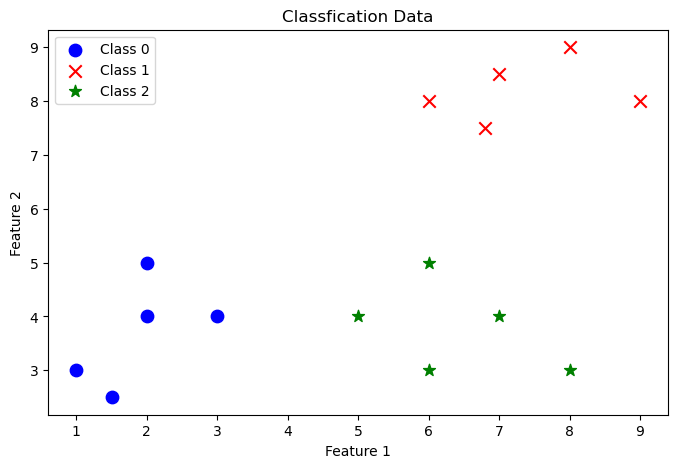

In [56]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(X1_c0[:,0], X1_c0[:,1], marker='o', s = 80, c='b', label="Class 0")
ax1.scatter(X1_c1[:,0], X1_c1[:,1], marker='x', s = 80, c='r', label="Class 1")
ax1.scatter(X1_c2[:,0], X1_c2[:,1], marker='*', s = 80, c='g', label="Class 2")
ax1.set_title('Classfication Data')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.legend(loc="upper left")
plt.show()

In [57]:
logisModel1 = LogisticRegression(penalty=None, solver='newton-cg', multi_class='multinomial')
logis1 = logisModel1.fit(X1, y1)

In [58]:
y_hat1 = logis1.predict(X1)
y_hat1

array([0, 0, 1, 0, 1, 1, 0, 0, 2, 2, 2, 1, 2, 2, 1])

In [59]:
logis1.score(X1,y1)

1.0

In [60]:
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.02)
x2grid = np.arange(y_min, y_max, 0.02)
xx, yy = np.meshgrid(x1grid,x2grid)
Z1 = logis1.predict(np.c_[xx.ravel(), yy.ravel()])
Z1 = Z1.reshape(xx.shape)

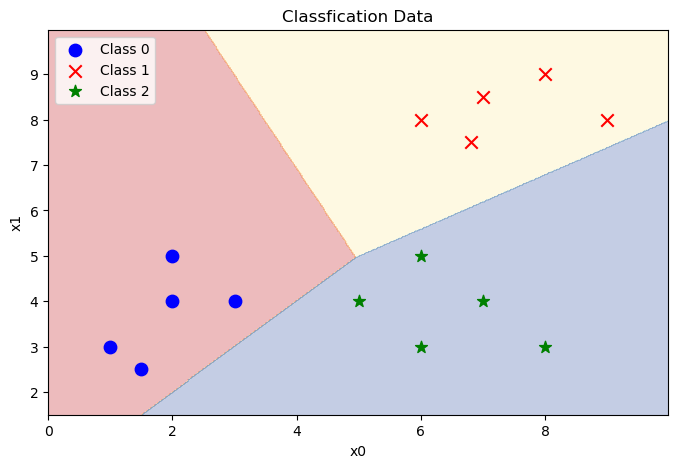

In [61]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, Z1, alpha=0.3, cmap=plt.cm.RdYlBu)
ax1.scatter(X1_c0[:,0], X1_c0[:,1], marker='o', s = 80, c='b', label="Class 0")
ax1.scatter(X1_c1[:,0], X1_c1[:,1], marker='x', s = 80, c='r', label="Class 1")
ax1.scatter(X1_c2[:,0], X1_c2[:,1], marker='*', s = 80, c='g', label="Class 2")
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
ax1.legend(loc="upper left")
plt.show()

### Test Example 1: Custom Function

In [62]:
y1

array([0, 0, 1, 0, 1, 1, 0, 0, 2, 2, 2, 1, 2, 2, 1])

In [63]:
k = len(np.unique(y1)) 
k

3

In [64]:
W1, b1, _, _, _ = sparse_categorical_softmax_gradient_descent(X1, y1, k, init_coefficient = None, init_intercept= None, 
                                                       iterations=10000, alpha=0.01, reguLambda = 0., printProgress=False)

iteration 9999: cost = 5.981354e-02: intercept = [[ 2.36272647 -3.28150276  0.91877628]]: weights = [[-2.20993449  1.50197251]
 [ 0.02134279  0.8329919 ]
 [ 2.18859169 -2.33496442]]
best w [[-2.209934  0.021343  2.188592]
 [ 1.501973  0.832992 -2.334964]]
best b [[ 2.362726 -3.281503  0.918776]]


In [65]:
y_predict1, y_proba1 = softmax_predict(X1, W1, b1)
y_predict1

array([0, 0, 1, 0, 1, 1, 0, 0, 2, 2, 2, 1, 2, 2, 1])

In [66]:
print('Train Accuracy: %f'%(np.mean(y_predict1.reshape(-1,1) == y1.reshape(-1,1)) * 100))
print('Compare Prediction with SciKit Learn: %f'%(np.mean(y_predict1.reshape(-1,1) == y_hat1.reshape(-1,1)) * 100))

Train Accuracy: 100.000000
Compare Prediction with SciKit Learn: 100.000000


In [67]:
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x1grid,x2grid)
ZG1, _ = softmax_predict(np.c_[xx.ravel(), yy.ravel()], W1, b1)
ZG1 = ZG1.reshape(xx.shape)

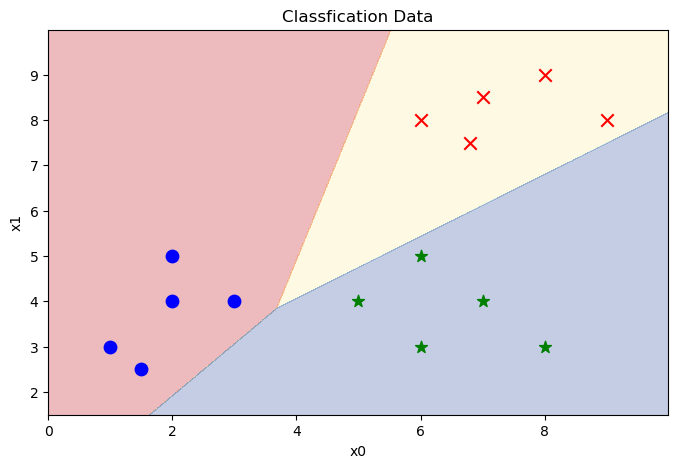

In [68]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, ZG1, alpha=0.3, cmap=plt.cm.RdYlBu)
ax1.scatter(X1_c0[:,0], X1_c0[:,1], marker='o', s = 80, c='b', label="Class 0")
ax1.scatter(X1_c1[:,0], X1_c1[:,1], marker='x', s = 80, c='r', label="Class 1")
ax1.scatter(X1_c2[:,0], X1_c2[:,1], marker='*', s = 80, c='g', label="Class 2")
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

### Test Example 2: SciKit Learn

In [69]:
print(X2.shape)
print(y2.shape)

(30, 2)
(30,)


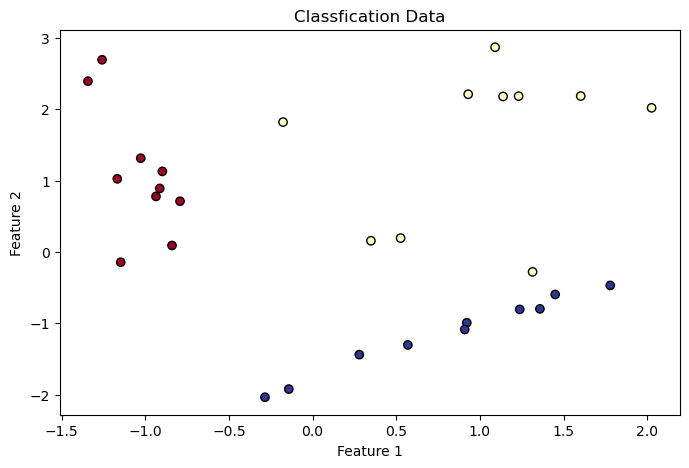

In [70]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(X2[:, 0], X2[:, 1], c=y2, edgecolors='k', cmap=plt.cm.RdYlBu)
ax1.set_title('Classfication Data')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
plt.show()

In [71]:
logisModel2 = LogisticRegression(penalty=None, solver='sag', multi_class='multinomial', max_iter=10000)
logis2 = logisModel2.fit(X2, y2)

In [72]:
y_hat2 = logis2.predict(X2)
y_hat2

array([2, 1, 2, 1, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 2, 2, 1, 1, 0,
       1, 2, 2, 2, 0, 1, 0, 2])

In [73]:
logis2.score(X2,y2)

1.0

In [74]:
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.02)
x2grid = np.arange(y_min, y_max, 0.02)
xx, yy = np.meshgrid(x1grid,x2grid)
Z2 = logis2.predict(np.c_[xx.ravel(), yy.ravel()])
Z2 = Z2.reshape(xx.shape)

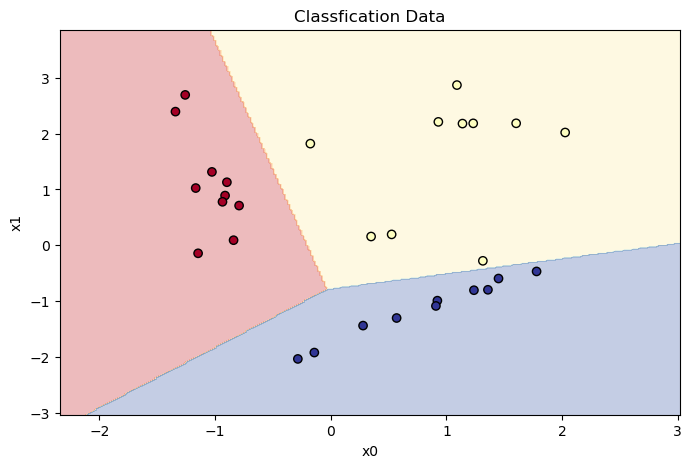

In [75]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, Z2, alpha=0.3, cmap=plt.cm.RdYlBu)
ax1.scatter(X2[:, 0], X2[:, 1], c=y2, edgecolors='k', cmap=plt.cm.RdYlBu)
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

### Test Example 2: Custom Function

In [76]:
y2

array([2, 1, 2, 1, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 2, 2, 1, 1, 0,
       1, 2, 2, 2, 0, 1, 0, 2])

In [77]:
k = len(np.unique(y2)) 
k

3

In [78]:
W2, b2, _, _, _ = sparse_categorical_softmax_gradient_descent(X2, y2, k, init_coefficient = None, init_intercept= None, iterations=50000, 
                                                       alpha=0.01, reguLambda = 0.)

iteration 49999: cost = 3.633611e-02: intercept = [[ 0.36676879  1.26667294 -1.63344173]]: weights = [[-5.39951481  1.48330491]
 [ 2.64053904  3.43675812]
 [ 2.75897577 -4.92006303]]
best w [[-5.399515  2.640539  2.758976]
 [ 1.483305  3.436758 -4.920063]]
best b [[ 0.366769  1.266673 -1.633442]]


In [79]:
y_predict2, y_proba2 = softmax_predict(X2, W2, b2)
y_predict2

array([2, 1, 2, 1, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 2, 2, 1, 1, 0,
       1, 2, 2, 2, 0, 1, 0, 2])

In [80]:
print('Train Accuracy: %f'%(np.mean(y_predict2.reshape(-1,1) == y2.reshape(-1,1)) * 100))
print('Compare Prediction with SciKit Learn: %f'%(np.mean(y_predict2.reshape(-1,1) == y_hat2.reshape(-1,1)) * 100))

Train Accuracy: 100.000000
Compare Prediction with SciKit Learn: 100.000000


In [81]:
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x1grid,x2grid)
ZG2, _ = softmax_predict(np.c_[xx.ravel(), yy.ravel()], W2, b2)
ZG2 = ZG2.reshape(xx.shape)

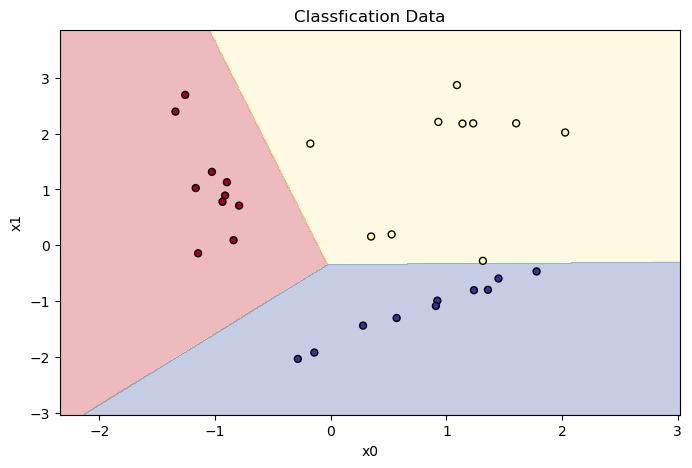

In [82]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, ZG2, alpha=0.3, cmap=plt.cm.RdYlBu)
plt.scatter(X2[:,0], X2[:,1], marker="o", c=y2, s=25, edgecolor='k', cmap=plt.cm.RdYlBu)
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

### Test Example 3: SciKit Learn

In [83]:
logisModel3 = LogisticRegression(penalty=None, solver='saga', multi_class='multinomial', max_iter=100000)
logis3 = logisModel3.fit(X3, y3)

In [84]:
logis3.score(X3,y3)

0.86

In [85]:
y_hat3 = logis3.predict(X3)

In [86]:
x_min, x_max = X3[:, 0].min() - 1, X3[:, 0].max() + 1
y_min, y_max = X3[:, 1].min() - 1, X3[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.02)
x2grid = np.arange(y_min, y_max, 0.02)
xx, yy = np.meshgrid(x1grid,x2grid)
Z3 = logis3.predict(np.c_[xx.ravel(), yy.ravel()])
Z3 = Z3.reshape(xx.shape)

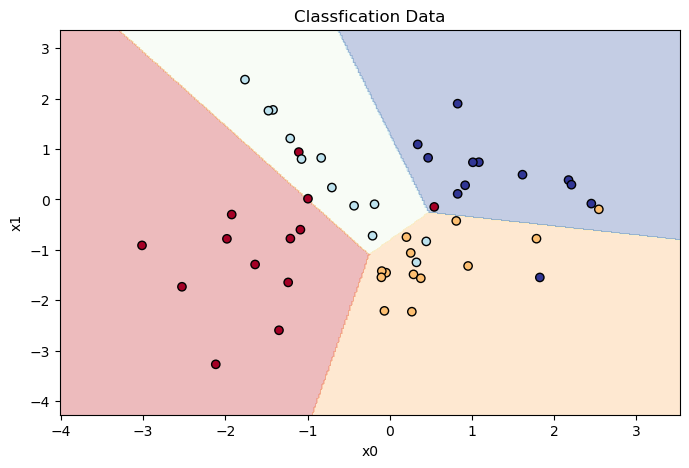

In [87]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, Z3, alpha=0.3, cmap=plt.cm.RdYlBu)
ax1.scatter(X3[:, 0], X3[:, 1], c=y3, edgecolors='k', cmap=plt.cm.RdYlBu)
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

### Test Example 3: Custom Function

In [88]:
y3.shape

(50,)

In [89]:
k = len(np.unique(y3)) 
k

4

In [90]:
W3, b3, _, _, _ = sparse_categorical_softmax_gradient_descent(X3, y3, k, init_coefficient = None, init_intercept= None, iterations=50000, 
                                                       alpha=0.01, reguLambda = 0., printProgress=True, printProgressRate=50000)

iteration 0: cost = 1.381615e+00: intercept = [[ 0.0001  0.0001 -0.0001 -0.0001]]: weights = [[-0.00366414 -0.00170263]
 [ 0.00169729 -0.0023708 ]
 [-0.00144479  0.0021109 ]
 [ 0.00341164  0.00196253]]
iteration 49999: cost = 5.002066e-01: intercept = [[-0.73157325 -0.66107653  1.42337684 -0.03072706]]: weights = [[-3.27891734 -0.73660123]
 [ 1.86549616 -1.8586196 ]
 [-1.11908172  0.73932004]
 [ 2.5325029   1.85590078]]
best w [[-3.278917  1.865496 -1.119082  2.532503]
 [-0.736601 -1.85862   0.73932   1.855901]]
best b [[-0.731573 -0.661077  1.423377 -0.030727]]


In [91]:
y_predict3, y_proba3 = softmax_predict(X3, W3, b3)

In [92]:
print('Train Accuracy: %f'%(np.mean(y_predict3.reshape(-1,1) == y3.reshape(-1,1)) * 100))
print('Compare Prediction with SciKit Learn: %f'%(np.mean(y_predict3.reshape(-1,1) == y_hat3.reshape(-1,1)) * 100))

Train Accuracy: 86.000000
Compare Prediction with SciKit Learn: 100.000000


In [93]:
x_min, x_max = X3[:, 0].min() - 1, X3[:, 0].max() + 1
y_min, y_max = X3[:, 1].min() - 1, X3[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x1grid,x2grid)
ZG3, _ = softmax_predict(np.c_[xx.ravel(), yy.ravel()], W3, b3)
ZG3 = ZG3.reshape(xx.shape)

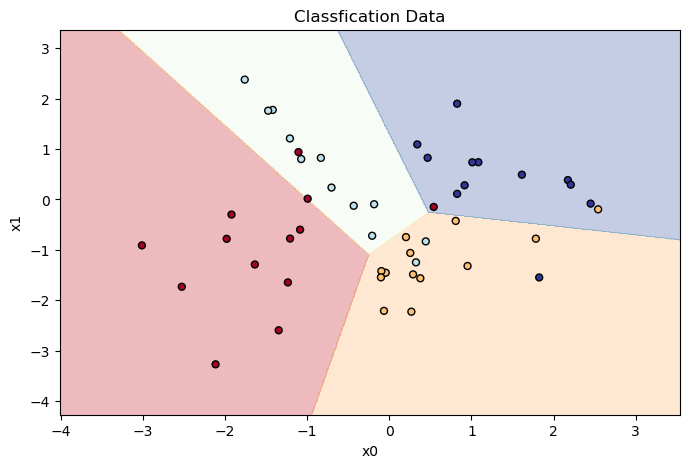

In [94]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, ZG3, alpha=0.3, cmap=plt.cm.RdYlBu)
plt.scatter(X3[:,0], X3[:,1], marker="o", c=y3, s=25, edgecolor='k', cmap=plt.cm.RdYlBu)
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

## End